# 250226-1

## 1. Load

In [3]:
import pickle
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# .pkl 파일에서 불러오기
with open("./data/data.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# 변수 개별 할당
y = data_loaded["y"]
yU = data_loaded["yU"]
yP = data_loaded["yP"]
t = data_loaded["t"]
regions = data_loaded["regions"]

# 예제 데이터를 생성
date_range = pd.date_range(start="2022-09-01", end="2022-09-15", freq="H")

# 지역명을 생성 (예시: "Location 1", "Location 2", ..., "Location 44")
region_names = regions

# 9월 1일부터 9월 15일까지의 데이터 필터링
start_date = "2022-09-01"
end_date = "2022-09-15"
filtered_t = t[(t >= start_date) & (t <= end_date)]
filtered_y = y[(t >= start_date) & (t <= end_date), :]

# 지역별 상관 행렬 계산
y_corr = np.corrcoef(y.T)  # 44*44 상관 행렬 계산

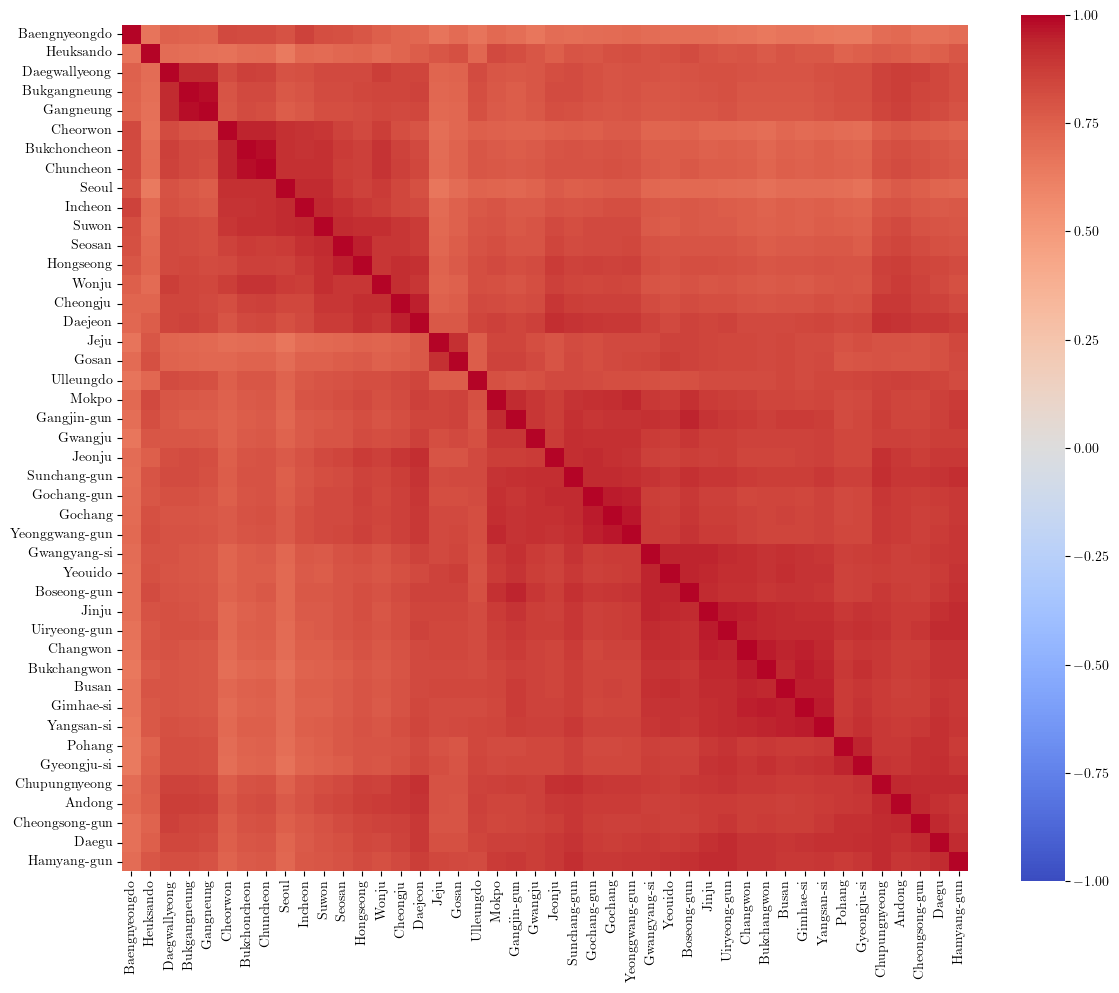

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list
import scipy.spatial.distance as ssd
import os

# LaTeX 스타일 폰트 설정
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})

# y_corr: 44×44 상관행렬
# region_names: 길이 44 지역명 리스트
# 예: y_corr = np.corrcoef(y.T)

# 1) 상관행렬을 거리행렬로 변환 (correlation → 1 - correlation)
dist = 1 - y_corr

# 2) distance matrix를 계층적 군집화가 요구하는 'condensed' 형태로 변환
dist_condensed = ssd.squareform(dist, checks=False)

# 3) 계층적 군집화로 순서 결정
Z = linkage(dist_condensed, method='average')   # method='ward', 'single' 등도 가능
leaf_order = leaves_list(Z)                    # 최종 리프 순서(소팅 인덱스)

# 4) 정렬 순서(leaf_order)에 따라 상관행렬과 지역명 재배열
y_corr_sorted = y_corr[leaf_order, :][:, leaf_order]
region_names_sorted = [region_names[i] for i in leaf_order]

# 5) 재정렬된 상관행렬 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(
    y_corr_sorted,
    xticklabels=region_names_sorted,
    yticklabels=region_names_sorted,
    cmap="coolwarm",  # 빨간색(양의 상관) ~ 파란색(음의 상관)
    vmin=-1, vmax=1,  # 상관계수 범위
    center=0,         # 0을 기준으로 색상 구분
    square=True
)
plt.xticks(rotation=90)
plt.tight_layout()


# 저장 경로 설정
save_path = "./figs/ycorr.pdf"
os.makedirs(os.path.dirname(save_path), exist_ok=True)
plt.savefig(save_path, format="pdf", dpi=300, bbox_inches='tight', facecolor='white')

# 그래프 출력
plt.show()

In [26]:
# 상관행렬의 상삼각 부분(대각선 제외)에서 도시 쌍과 상관계수 추출
pairs = []
n = len(region_names)
for i in range(n):
    for j in range(i + 1, n):
        pairs.append((region_names[i], region_names[j], y_corr[i, j]))

# 상위 10개 도시 쌍 추출
top_pairs = pairs_sorted[:10]

# 하위 10% 추출 (전체 쌍의 10%에 해당하는 개수)
num_bottom = int(len(pairs_sorted) * 0.1)
# 하위 10%는 리스트의 뒤쪽 num_bottom 요소 (상관계수가 낮은 쌍)
bottom_pairs = sorted(pairs_sorted[-num_bottom:], key=lambda x: x[2])

# 결과 출력: 상위 10개
print("상위 10 (상관계수가 높은 도시 쌍):")
for region1, region2, corr_value in top_pairs:
    print(f"{region1} - {region2}: {corr_value:.4f}")

print("\n하위 10% (상관계수가 낮은 도시 쌍):")
for region1, region2, corr_value in bottom_pairs:
    print(f"{region1} - {region2}: {corr_value:.4f}")

상위 10 (상관계수가 높은 도시 쌍):
Bukchoncheon - Chuncheon: 0.9834
Bukgangneung - Gangneung: 0.9789
Gochang - Yeonggwang-gun: 0.9681
Gochang - Gochang-gun: 0.9583
Jinju - Uiryeong-gun: 0.9583
Changwon - Bukchangwon: 0.9569
Gimhae-si - Yangsan-si: 0.9544
Gimhae-si - Bukchangwon: 0.9538
Changwon - Gimhae-si: 0.9498
Busan - Gimhae-si: 0.9488

하위 10% (상관계수가 낮은 도시 쌍):
Seoul - Heuksando: 0.6422
Baengnyeongdo - Gyeongju-si: 0.6441
Baengnyeongdo - Pohang: 0.6477
Baengnyeongdo - Bukchangwon: 0.6505
Baengnyeongdo - Yangsan-si: 0.6561
Seoul - Jeju: 0.6581
Baengnyeongdo - Gwangju: 0.6626
Baengnyeongdo - Gimhae-si: 0.6643
Baengnyeongdo - Busan: 0.6654
Baengnyeongdo - Changwon: 0.6661
Baengnyeongdo - Ulleungdo: 0.6683
Baengnyeongdo - Heuksando: 0.6705
Baengnyeongdo - Jeju: 0.6706
Cheorwon - Heuksando: 0.6774
Seoul - Gyeongju-si: 0.6786
Baengnyeongdo - Uiryeong-gun: 0.6794
Baengnyeongdo - Cheongsong-gun: 0.6819
Baengnyeongdo - Daegu: 0.6863
Gangneung - Heuksando: 0.6864
Seoul - Bukchangwon: 0.6872
Cheorwon - Je

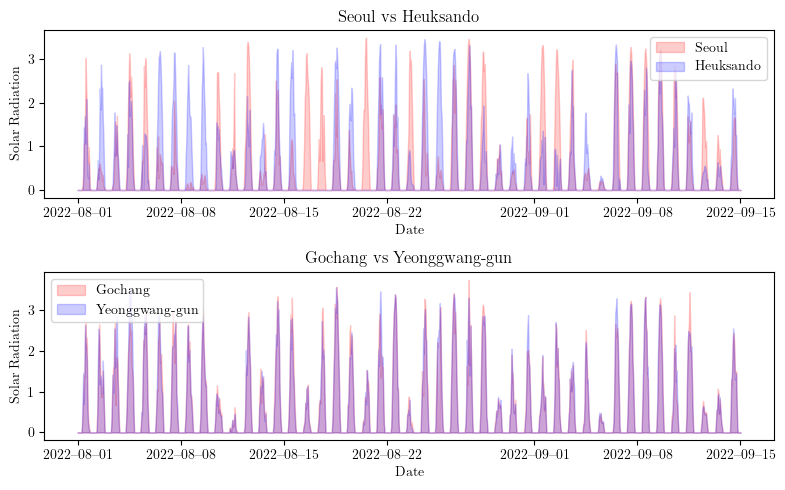

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# LaTeX 스타일 폰트 설정
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})

# 9월 1일부터 9월 15일까지의 데이터 필터링
start_date = "2022-08-01"
end_date = "2022-09-15"
filtered_t = t[(t >= start_date) & (t <= end_date)]
filtered_y = y[(t >= start_date) & (t <= end_date), :]


# 2x1 서브플롯 설정
fig, axes = plt.subplots(2, 1, figsize=(8, 5))

# 첫 번째 플롯: 대전 vs 서산 (투명도 적용 area plot)
axes[0].fill_between(filtered_t, filtered_y[:, regions.index("Seoul")], color='red', alpha=0.2, label="Seoul")
axes[0].fill_between(filtered_t, filtered_y[:, regions.index("Heuksando")], color='blue', alpha=0.2, label="Heuksando")
axes[0].set_title("Seoul vs Heuksando", fontsize=12)
axes[0].set_xlabel("Date", fontsize=10)
axes[0].set_ylabel("Solar Radiation", fontsize=10)
axes[0].xaxis.set_major_formatter(mdates.DateFormatter("%Y–%m–%d"))
axes[0].legend()

# 두 번째 플롯: 철원 vs 인천 (투명도 적용 area plot)
axes[1].fill_between(filtered_t, filtered_y[:, regions.index("Gochang")], color='red', alpha=0.2, label="Gochang")
axes[1].fill_between(filtered_t, filtered_y[:, regions.index("Yeonggwang-gun")], color='blue', alpha=0.2, label="Yeonggwang-gun")
axes[1].set_title("Gochang vs Yeonggwang-gun", fontsize=12)
axes[1].set_xlabel("Date", fontsize=10)
axes[1].set_ylabel("Solar Radiation", fontsize=10)
axes[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y–%m–%d"))
axes[1].legend()

# 배경색 설정 (하얀색)
fig.patch.set_facecolor('white')

# 그래프 레이아웃 조정
plt.tight_layout()

# 저장 경로 설정
save_path = "./figs/Seoul_Heuksando_Gochang_hamyang_Yeonggwang-gun.pdf"
os.makedirs(os.path.dirname(save_path), exist_ok=True)
plt.savefig(save_path, format="pdf", dpi=300, bbox_inches='tight', facecolor='white')

# 그래프 출력
plt.show()

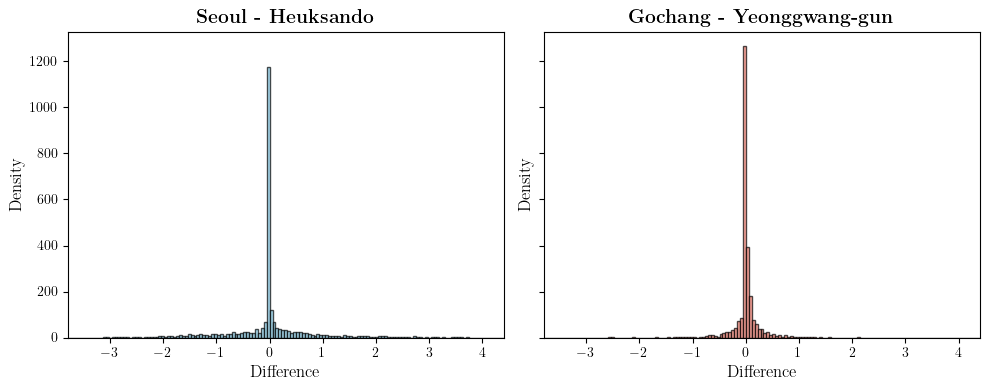

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# 각 도시 쌍의 차이 계산
diff_seoul_heuksando = y[:, regions.index("Seoul")] - y[:, regions.index("Heuksando")]
diff_gochang_yeonggwang = y[:, regions.index("Gochang")] - y[:, regions.index("Yeonggwang-gun")]

# 두 데이터의 공통 x축 범위 결정 (여유분 추가)
global_min = min(diff_seoul_heuksando.min(), diff_gochang_yeonggwang.min())
global_max = max(diff_seoul_heuksando.max(), diff_gochang_yeonggwang.max())
margin = 0.1 * (global_max - global_min)
x_min = global_min - margin
x_max = global_max + margin

# 더 많은 bin 사용 (50개)
bins = np.linspace(x_min, x_max, 150)

# 서브플롯 생성 (1행 2열, x, y축 통일)
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

# 첫 번째 서브플롯: Seoul - Heuksando
axes[0].hist(diff_seoul_heuksando, bins=bins, density=False, color='skyblue',
             edgecolor='black', alpha=0.7)
axes[0].set_title(r'\textbf{Seoul - Heuksando}', fontsize=14)
axes[0].set_xlabel('Difference', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)

# 두 번째 서브플롯: Gochang - Yeonggwang-gun
axes[1].hist(diff_gochang_yeonggwang, bins=bins, density=False, color='salmon',
             edgecolor='black', alpha=0.7)
axes[1].set_title(r'\textbf{Gochang - Yeonggwang-gun}', fontsize=14)
axes[1].set_xlabel('Difference', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

# 공통 x축, y축 범위 적용
axes[0].set_xlim(x_min, x_max)
axes[1].set_xlim(x_min, x_max)
ymax = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
axes[0].set_ylim(0, ymax)
axes[1].set_ylim(0, ymax)

plt.tight_layout()

# 고해상도 PDF로 저장 (dpi=300)
plt.savefig("./figs/high_res_histogram_ydiff.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()

:::{.callout-note}

**1. 노드 간 유사성 분석**

노드 간의 유사성을 분석하는 가장 간단한 방법은 주어진 자료(=일사량)로부터 단순히 상관계수(correlation)를 계산하는 것이다.

**2. 상관행렬 시각화**

그림 1(Fig1)은 각 지역 간 일사량의 상관계수를 행렬 형태로 나타낸 것이다. 대부분의 지역에서 높은 상관성을 보이며, 특히 인접한 지역끼리 강한 상관관계를 나타낸다.

**3. 분석 결과**

그림 1을 분석하면, 대부분의 지역이 매우 높은 유사성을 가지고 있음을 알 수 있다. 가장 유사도가 낮은 지역 쌍은 서울과 혁산도(Heuksando)이며, 이들의 상관계수는 0.6422이다. 이는 직관적으로 분석자가 예상하는 것보다 높은 수치이다.

**4. 지역 간 일사량 비교**

그림 2(Fig2)를 관찰하자. 그림 2의 상단은 상관계수가 가장 낮은 서울-혁산도의 일사량 시계열 그래프이며, 하단은 상관계수가 매우 높은 고창(Gochang)과 영광군(Yeonggwang-gun)의 일사량 그래프이다. 후자의 경우 상관계수는 0.9681로, 두 지역 간의 일사량 패턴이 매우 유사하다.

**5. 서울-혁산도의 상관계수 분석**

그림 2의 하단에서 볼 수 있듯이, 고창과 영광군은 매우 유사한 일사량 패턴을 가지므로, 노드 간의 인접성을 0.9681로 고려하여 분석하는 것이 타당해 보인다. 반면, 그림 2의 상단을 보면 서울과 혁산도의 일사량 패턴이 매우 다름을 확인할 수 있다. 서울의 일사량이 높은 날에 혁산도의 일사량이 거의 0인 경우도 있으며, 반대의 경우도 빈번하다. 이로 인해 두 지역은 거의 반대 방향의 패턴을 보일 수도 있다. 따라서 상관계수 0.6422는 직관적으로 의심스럽다.

**6. 높은 상관계수가 나타난 이유**

왜 우리가 보기에는 유사하지 않은 두 지역(서울-혁산도)의 상관계수가 높게 나타났을까? 이는 두 지역 모두 강한 주기성을 가지기 때문이다. 즉, 낮 동안 일사량이 존재하고, 밤에는 항상 0이 되는 특성으로 인해, 이러한 주기성에서 오는 유사성이 상관계수에 반영된 것이다. 이는 시계열 데이터에서 흔히 발생하는 '가짜 상관관계' 현상으로, 실제로는 관련성이 낮은 두 변수 간에도 높은 상관계수가 나타날 수 있는 문제를 초래한다. 특히, 주기적인 패턴이 강한 데이터에서는 낮과 밤에 따른 변동성이 반복되면서, 단순 상관계수 계산만으로는 데이터 간의 진정한 관계를 파악하기 어렵다. 이러한 주기성으로 인해 가짜 상관관계가 발생하는 사례는 여러 가지가 있다. 대표적으로 일사량뿐만 아니라 기온, 조수 간만의 차, 경제지표(예: 월별 매출 데이터), 주식시장 변동성 등이 있다. 예를 들어, 계절성 요인이 강한 소매업 매출 데이터를 단순히 상관분석하면, 전혀 연관성이 없는 매장이 같은 패턴을 보이기 때문에 높은 상관관계를 나타낼 수 있다. 또한, 주식 시장에서 특정 요일마다 반복되는 가격 패턴이나, 하루 중 특정 시간대에 거래량이 몰리는 경우에도 실제 경제적 관계 없이 높은 상관계수가 도출될 수 있다. 따라서 이러한 자료에서는 주기성을 적절히 고려한 분석이 필수적이다.

**7. 차이값 기반의 유사성 분석**

서울-혁산도의 높은 상관계수 값을 직관적으로 이해하기 용이하도록 히스토그램을 작성하였다. 그림 3(Fig3)의 왼쪽은 서울-혁산도의 일사량 차이를 히스토그램으로 나타낸 것이며, 오른쪽은 고창-영광군의 일사량 차이를 히스토그램으로 나타낸 것이다. 그림 2와 달리, 이제 서울-혁산도의 일사량 차이값 역시 고창-영광군 못지않게 유사해 보인다. 이는 대부분의 값이 0에 몰려 있어 두 시계열이 매우 유사해 보이도록 만드는 효과를 낳는다. 그러나 이 값들의 대부분은 해가 뜨지 않아 양쪽 지역의 일사량이 모두 0이었기 때문에 나타난 결과이다.

**8. 주기성을 제외한 상관계수 분석 필요성**

이는 우리가 원하는 방식의 상관계수 계산 방법이 아니다. 주기성이 강한 시계열 데이터에서는 단순 상관계수만으로 두 데이터 간의 관계를 올바르게 파악하기 어렵다. 특히, 낮과 밤의 반복되는 패턴이 강한 기상 데이터나 계절성 매출 데이터에서는 실제 상관성이 없거나 약한 경우에도 높은 상관계수가 나타날 수 있다. 이러한 착시 효과를 줄이기 위해서는 단순한 상관계수 계산을 넘어선 추가적인 분석 기법이 필요하다. 그렇다면 어떻게 개선할 수 있을까?

- 일사량이 0인 시점을 상관계수 계산에서 제외할 수 있다. 그러나 이는 비/구름과 같은 기상 상황에 따른 영향을 고려하지 못하는 문제가 있다.
- 해가 뜨지 않는 시간을 제외할 수도 있다. 하지만, 해가 뜨고 지는 시간은 계절과 지역에 따라 차이가 있으므로 일괄적인 제거는 적절하지 않다.

**9. 주기성 제거 방법 적용**

Kim et al. (연구 인용)에서는 이러한 자료의 유사성을 분석할 때 주기 성분을 제외하는 것이 타당하다고 제안하였다. 주기 성분을 제거하는 방법으로 EPT (Ensemble Patch Transform)을 활용할 수 있으며, 본 연구에서는 해당 방법을 채택하여 분석을 진행하였다. 이에 대한 상세한 내용은 이후 섹션에서 다룬다.


:::